In [1]:
import numpy as np

In [6]:
X = 2 * np.random.rand(100, 1)

In [7]:
y = 4 + 3 * X + np.random.randn(100, 1)

In [10]:
X_b = np.c_[np.ones((100, 1)), X]

In [11]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
# normal equation

In [12]:
theta_best

array([[4.16524478],
       [2.74757474]])

In [13]:
X_new = np.array([[0],[2]])

In [14]:
X_new_b = np.c_[np.ones((2, 1)), X_new]

In [15]:
y_predict = X_new_b.dot(theta_best)

In [16]:
y_predict

array([[4.16524478],
       [9.66039427]])

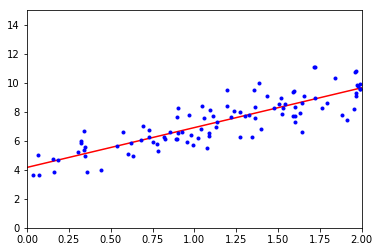

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [20]:
# use model
from sklearn.linear_model import LinearRegression

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.16524478]), array([[2.74757474]]))

In [23]:
lin_reg.predict(X_new)

array([[4.16524478],
       [9.66039427]])

In [28]:
# BGD
eta = 0.1
n_iterations = 1000
m = 100

In [29]:
theta = np.random.randn(2, 1)

In [30]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [31]:
theta

array([[4.16524478],
       [2.74757474]])

In [37]:
#SGD
n_epochs = 500
t0, t1 = 5, 50
def learning_schedule(t) :
    return t0 / (t + t1)
theta = np.random.randn(2, 1)
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        radients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients


In [38]:
theta

array([[-1.23179283],
       [-1.68507099]])

In [41]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter = 50, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


(array([4.14656993]), array([2.72477991]))

In [42]:
#polynomial
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

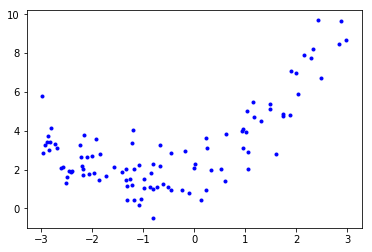

In [44]:
plt.plot(X, y, "b.")

In [45]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [46]:
X[0]

array([-2.95495367])

In [47]:
X_poly[0]

array([-2.95495367,  8.73175119])

In [48]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.01402987]), array([[1.04360636, 0.53532297]]))

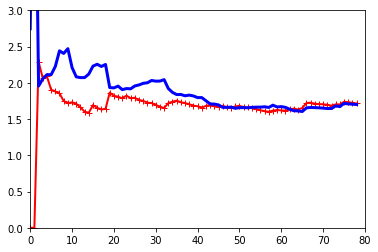

In [55]:
#learning curves
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "val")
    plt.axis([0, 80, 0, 3])
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

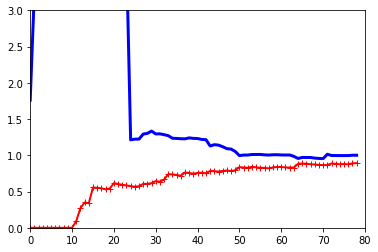

In [56]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline((("poly_features", PolynomialFeatures(degree=10, include_bias=False)), ("sgd_reg", LinearRegression()),))
plot_learning_curves(polynomial_regression, X, y)

In [57]:
# Ridge
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.71657617]])

In [ ]:
#early stopping
from sklearn.base import clone
sgd_reg = SGDRegressor(n_tier=1, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_poly, y)
    
    